# Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.dates as mdates
from matplotlib.ticker import FormatStrFormatter
import numpy as np

# Part One

<font size=4>Calculate the average (mean) download speed per day for each of the 4 network operators and provide a good visualization of the time series.

>To calculate this, I began by reading the dataset into a dataframe. Afterwards, I converted the **hour_read_at** column to be datetime data type and get the actual date using the **dt.date** accessor from Pandas series. This is to filter the hour of the day the the measurement reading was taken. Next, I compute the mean of the **download_speed** grouped by network operator and day. This should reveal the mean download speed for each day and network operator across the entire dataset. For each network operator, I plot a timeseries using a line graph visualisation. Line graph is selected because it is easy to read and plot as well as being useful for showing changes over periods of time. The figure below presents the results from the average download speed per day for each network operator. I assume that the download speed is in **Mbps**</font>

Text(-0.01, 0.5, 'Average Download Speed (Mbps)')

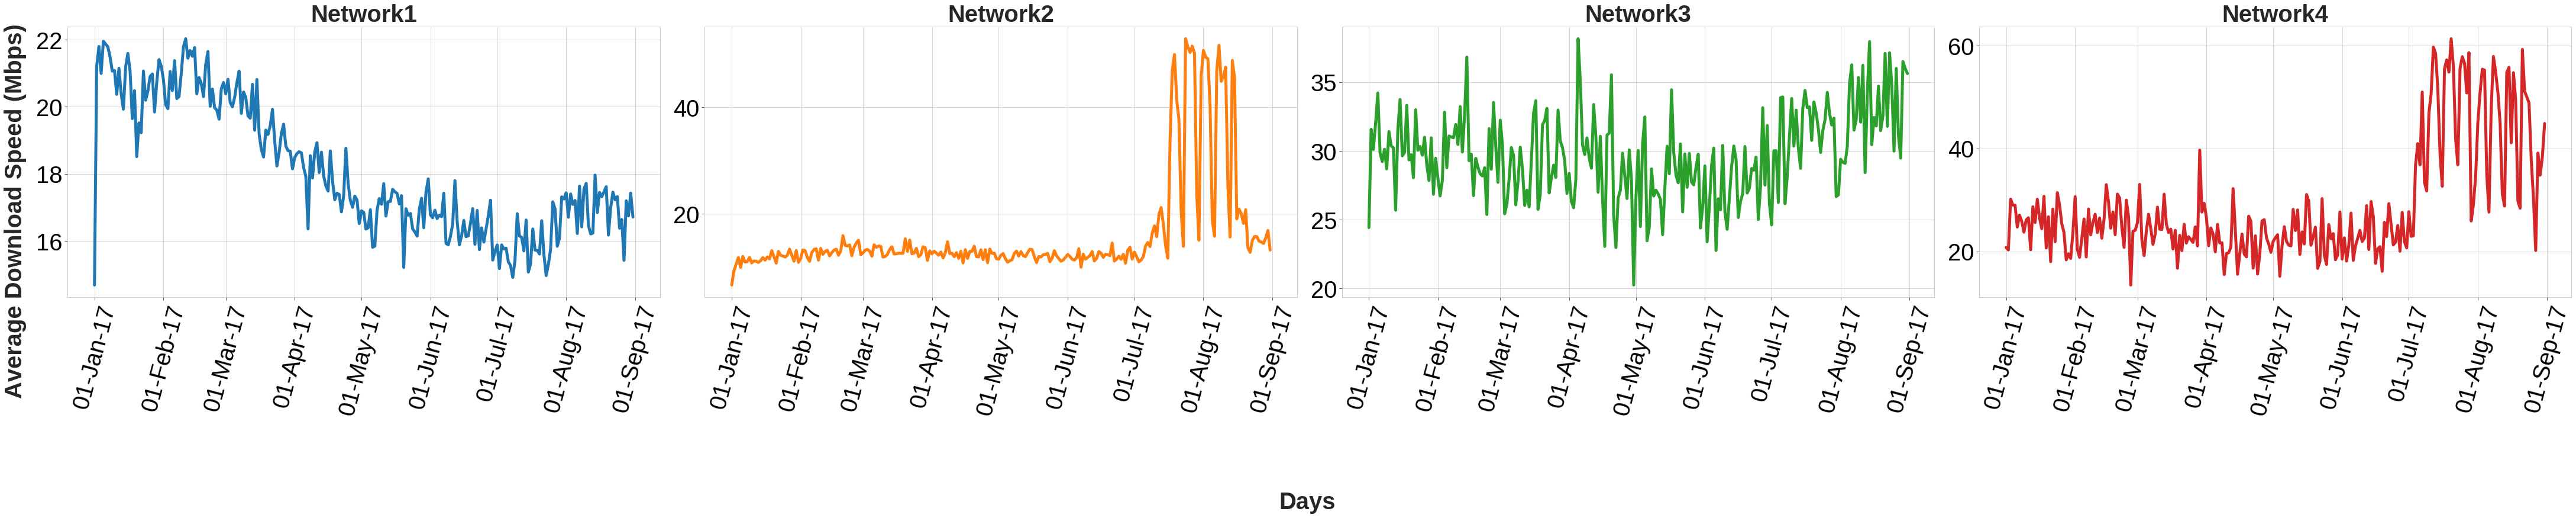

In [10]:
plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(nrows=1, ncols=4, figsize=(60, 10))

line_color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

df = pd.read_csv('speed_data.csv', sep=",")
df['hour_read_at'] =  pd.to_datetime(df['hour_read_at'], format='%d/%m/%Y %H:%M').dt.date # Getting dates without hour readings

mean_df = df.groupby([df['network_name_mapped'], df['hour_read_at']]).agg({'download_speed':'mean'}).reset_index()
network_operators = mean_df['network_name_mapped'].unique().tolist() # Extracting all available network operator 

i = 0
for network_operator in network_operators:
    
    # Select x and y axis data for a particular network
    xdata = mean_df.loc[mean_df['network_name_mapped'] == network_operator, 'hour_read_at']
    ydata = mean_df.loc[mean_df['network_name_mapped'] == network_operator, 'download_speed']
    
    #Plot
    ax[i].plot(xdata, ydata, color=line_color[i], lw = 5)
    ax[i].set_title(network_operator,fontweight="bold", size=40)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y')) 
    ax[i].tick_params(axis="x", labelsize=40, labelcolor="black", direction="out", labelrotation=75,length=5)
    ax[i].tick_params(axis="y", labelsize=40, labelcolor="black", direction="out", length=5)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    i+=1
plt.tight_layout()

# Axis labeling and positioning
fig.text(0.5, -0.2, 'Days', ha='center', fontweight='bold', size=40)
fig.text(-0.01, 0.5, 'Average Download Speed (Mbps)', va='center', rotation='vertical', fontweight='bold', size=40)


<font size=4> 
> The Figure above presents the average daily download speed for each network. I observe a stable speed on **Network3** with an average download speed most times above 25Mbps while there is a steady decline in  **Network1** between March to July, the average speed across **Network2** and **Network4** is below 30Mbps between January and July then a spike in speed.
</font>

<font size=4>Can you spot any differences in the daily mean time series when you use only the automatic (i.e. test_type==’speeds’) tests and when you use only the manual (i.e. test_type==’manual’) tests?

> To visualise this diffrences, I compute the mean download speed per day across each network for each test type (automatic and manual). I filter out each test type to produce the figure below:  
</font>

Text(-0.01, 0.5, 'Average Download Speed')

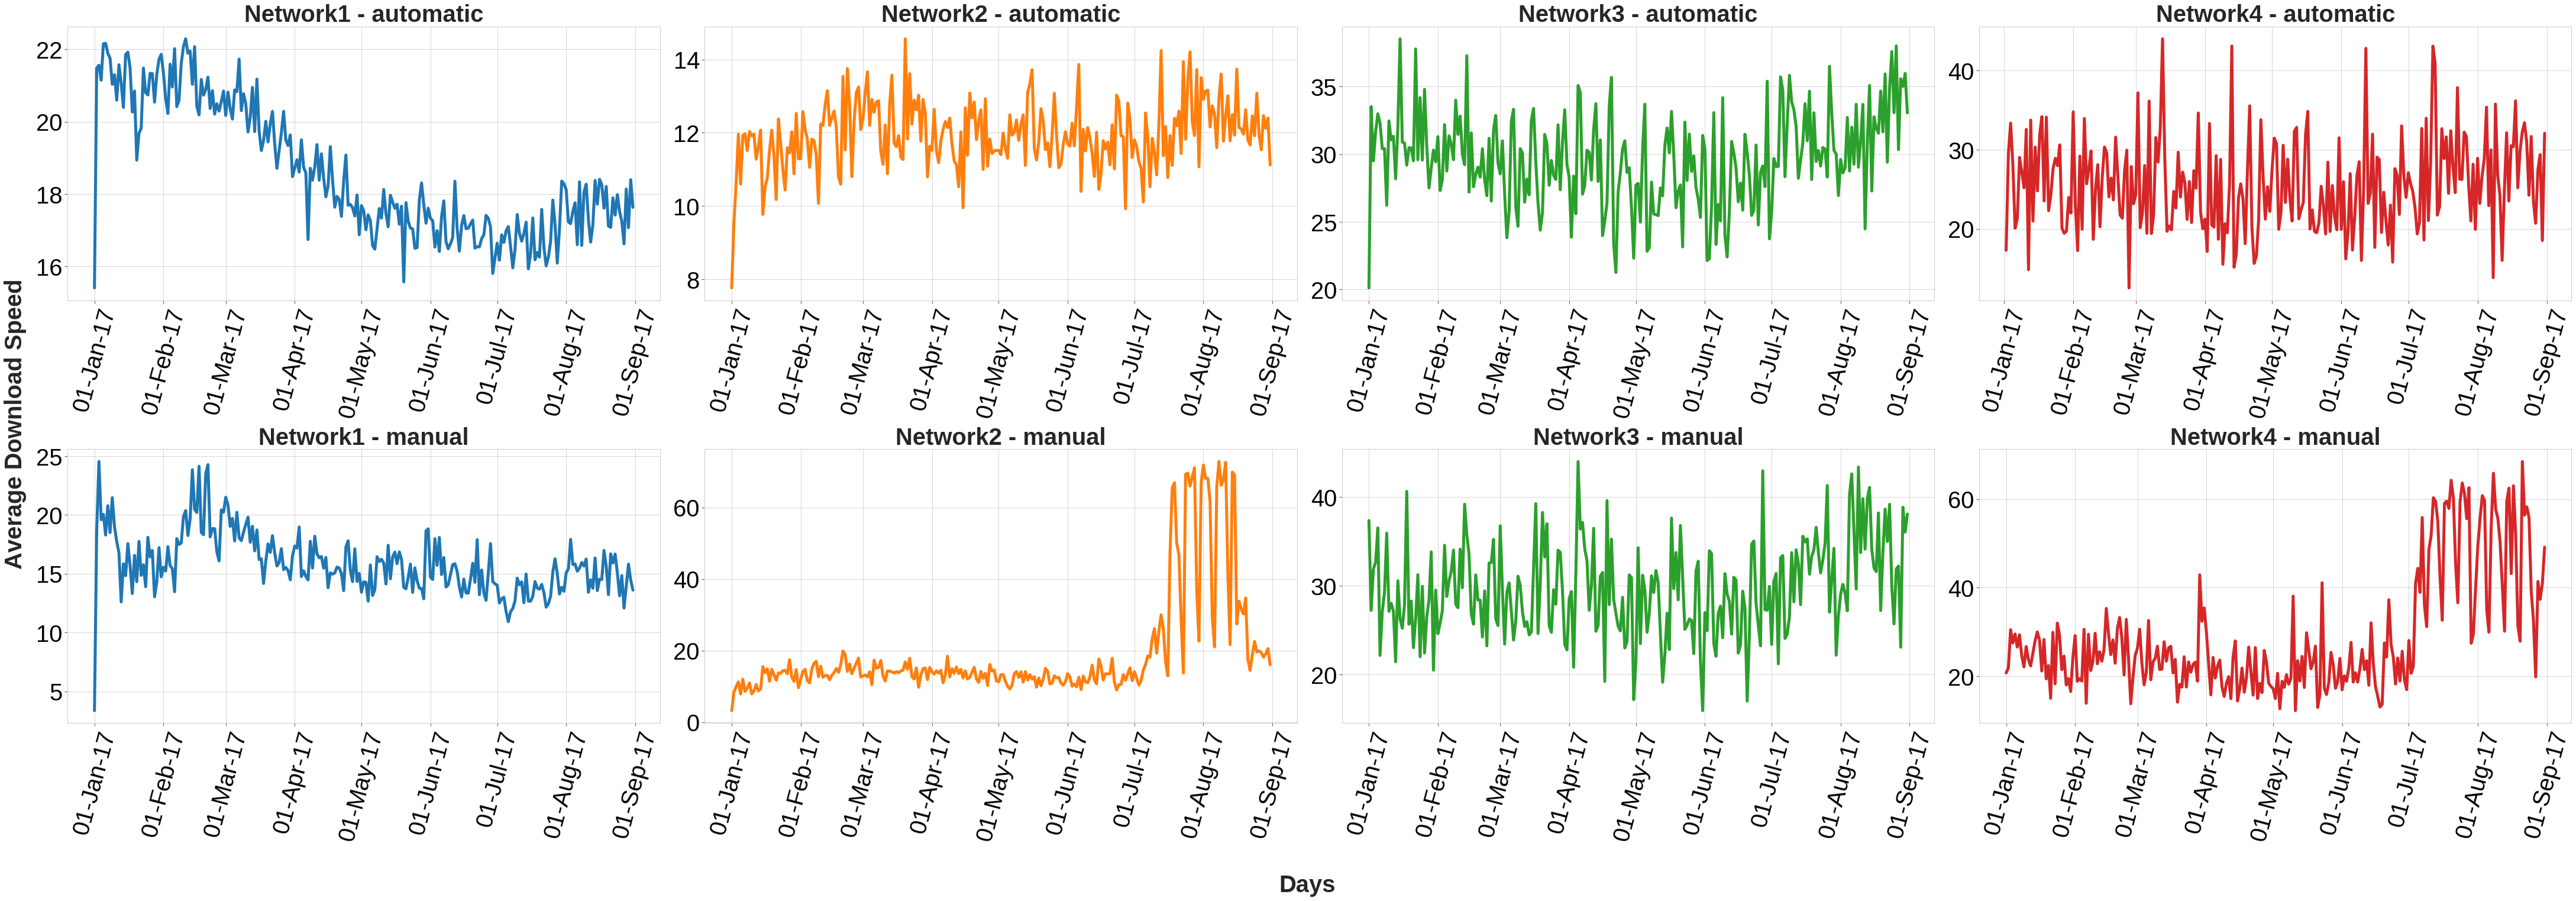

In [7]:
plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(nrows=2, ncols=4, figsize=(60,20))


line_color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


df = pd.read_csv('speed_data.csv', sep=",")

df['hour_read_at'] =  pd.to_datetime(df['hour_read_at'], format='%d/%m/%Y %H:%M').dt.date

# Computing average daily mean across each network operator for each test type
mean_df = df.groupby([df['network_name_mapped'], df['test_type'], df ['hour_read_at']]).agg({'download_speed':'mean'}).reset_index()

network_operators = mean_df['network_name_mapped'].unique().tolist() # Get Network operators
test_types = mean_df['test_type'].unique().tolist() # Get test types

c = 0
for test_type in test_types:
    
    n_data = mean_df[mean_df['test_type']==test_type] # Filter out test type
    i=0
    for network_operator in network_operators:
        
        # Select x and y axis data for a particular network
        xdata = n_data.loc[n_data['network_name_mapped'] == network_operator, 'hour_read_at']
        ydata = n_data.loc[n_data['network_name_mapped'] == network_operator, 'download_speed']
        
        #plot
        ax[c,i].plot(xdata, ydata, color=line_color[i], lw = 5)
        ax[c,i].set_title(network_operator+' - '+test_type,fontweight="bold", size=40)
        ax[c,i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y')) 
        ax[c,i].tick_params(axis="x", labelsize=40, labelcolor="black", direction="out", labelrotation=75,length=5)
        ax[c,i].tick_params(axis="y", labelsize=40, labelcolor="black", direction="out", length=5)
        ax[c,i].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
        i+=1
        
    c+=1
plt.tight_layout()

# Axis labeling and positioning 
fig.text(0.5, -0.05, 'Days', ha='center', fontweight='bold', size=40)
fig.text(-0.01, 0.5, 'Average Download Speed (Mbps)', va='center', rotation='vertical', fontweight='bold', size=40)


<font size=4> 
> The diffrence I spotted for some network operators are as follows: <ul><li>**Network1:** The steady decline is driven by mainly measurement readings taking automatically as there appears to be average download speed stability across manual readings.</li><li>**Network2 & Network4:** The spike between July and August are largely due to manual measurement readings taken during that period.</li></ul>
    
Can you provide any explanation on why such difference is observed?
> The differences in average download speed across each network operator might be due to the device from which the measurement reading is gotten from. For example, hardware configuration e.g. NIC might differ for device. Also, processes e.g. application updates running on a device might also affect the download speed when the reading is taken.

What other information would be useful to analyse to explain the difference?
> The standard deviation of the download speed for each day can be computed alongside the number of meaurement devices that fall below and above the average daily speed across each network operator. This would be useful in detecting if measurement readings from few devices could influence the average download speed value 
</font>

<font size=4>
Please share any other analysis or observations on the behaviour of the daily mean speed time series.
    
> I computed the average download speed for each hour of the day acrosss the dataset. The Figure below depicts this.
</font>

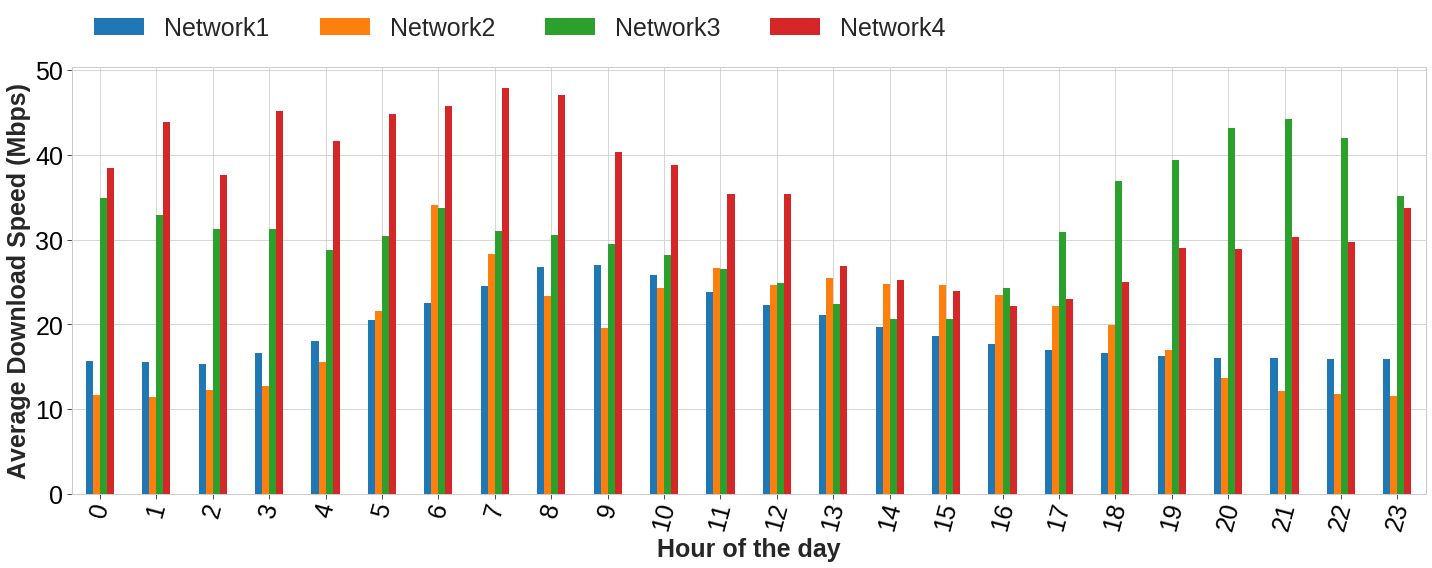

In [11]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20, 8))  # Create matplotlib figure
ax = fig.add_subplot(111) 


line_color = ['#1f77b4', '#ff7f0e','#2ca02c', '#d62728']

df = pd.read_csv('speed_data.csv', sep=",")

df['hour_read_at'] =  pd.to_datetime(df['hour_read_at'], format='%d/%m/%Y %H:%M').dt.hour # Extract hour

mean_df = df.groupby([df['network_name_mapped'], df['hour_read_at']]).agg({'download_speed':'mean'}).reset_index()

mean_df = mean_df.pivot(index='hour_read_at', columns='network_name_mapped', values='download_speed')

#Plot
mean_df.plot.bar(color=line_color, ax=ax, legend=False)
h1, l1 = ax.get_legend_handles_labels()
ax.legend(h1, l1, fontsize=25, ncol=5, loc='lower left', bbox_to_anchor= (0.0, 1.01))
ax.set_xlabel('Hour of the day', fontsize=25, fontweight="bold")
ax.set_ylabel('Average Download Speed (Mbps)', fontsize=25, fontweight="bold")
ax.tick_params(axis="x", labelsize=25, labelcolor="black", direction="out", length=5, labelrotation=75, pad=0.5)
ax.tick_params(axis="y", labelsize=25, labelcolor="black", direction="out", length=5)
plt.tight_layout()



<font size=4>
    
> I observe that when I compare the hourly average download speed across dataset to the average LTE speed for countries where measurement reading was taken, in Network 3 & 4 79% of the time in a day, the average download speed is more than the country (Taiwan) wide download speed of 26.85Mbps for that year. Whilst in Network 1 & 2 83% of the time its above the country (USA) average of 14.99Mbps. Country wide average speed gotten from <a>https://www.opensignal.com/reports/2017/06/state-of-lte</a>
</font>

# Part Two

<font size=4>Can you develop a method that filters tests or devices and provide a report describing your method and its limitations? Provide a method that would be practical to use, so for example it should not use out of sample information (ie. for any day it does not use ‘future’ data) and does not filter entire days.

>  A method that can be used to filter out these anomalous meaurement entries is computing the number of measurements received from each device on each network on a particular day. Whenever the measurement reading from a device is greater than one, the maximum download speed value generated by that device on that day is selected. Afterwards, the average daily download speed across each network can be computed. This ensures that measurement readings from a device is taken at most once in a day.

> The limitation of using this method is that other measurement record are ignored which may skew the result upwards affecting the average daily download speed because the selected maximum download speed might just be an outlier

Please include a visualization of the mean daily speed time series after you have removed the anomalies.

> The figure below shows the average daily download speed when the anomalies have been handled.
</font>

Text(-0.01, 0.5, 'Average Download Speed')

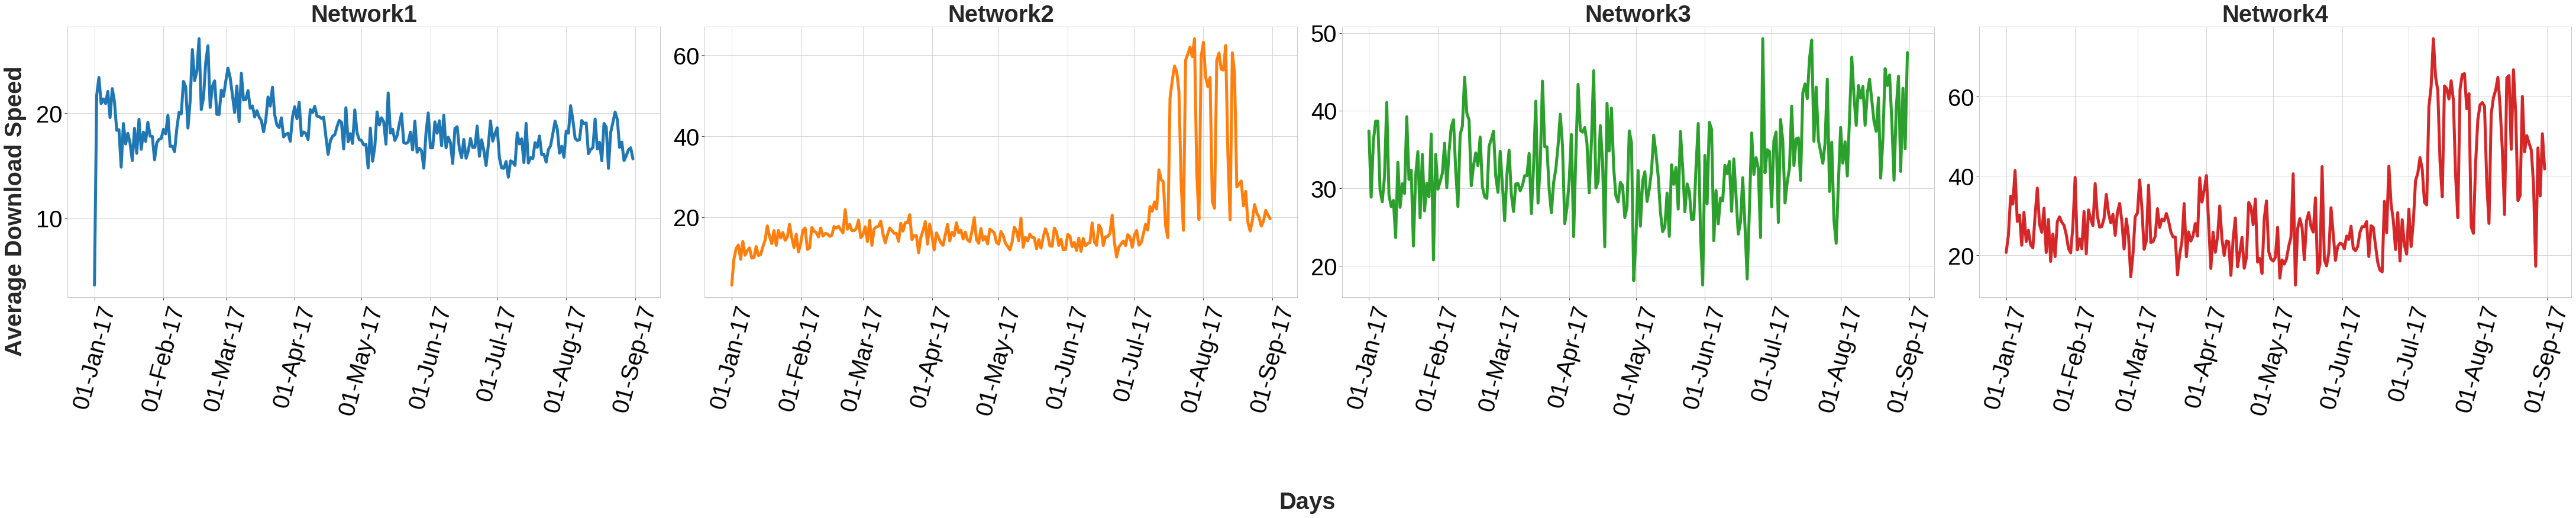

In [14]:
plt.style.use('seaborn-whitegrid')
fig, ax= plt.subplots(nrows=1, ncols=4, figsize=(60, 10))


line_color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']


df = pd.read_csv('speed_data.csv', sep=",")
df = df.loc[df['test_type']=='manual'] # Selecting just manual measurement readings
df['hour_read_at'] =  pd.to_datetime(df['hour_read_at'], format='%d/%m/%Y %H:%M').dt.date

# Selecting maximum measurement reading
df = df.groupby([df['device_id_time'],df['network_name_mapped'], df['hour_read_at']]).agg({'download_speed': 'max'}).reset_index()

# Computing average daily mean after handling the multiple entries
#mean_df = df['download_speed'].groupby([df['network_name_mapped'], df['hour_read_at']]).mean().reset_index()

mean_df = df.groupby([df['network_name_mapped'], df['hour_read_at']]).agg({'download_speed':'mean'}).reset_index()

i = 0
for network_operator in network_operators:
    xdata = mean_df.loc[mean_df['network_name_mapped'] == network_operator, 'hour_read_at']
    ydata = mean_df.loc[mean_df['network_name_mapped'] == network_operator, 'download_speed']
    
    #Plot
    ax[i].plot(xdata, ydata, color=line_color[i], lw = 5)
    ax[i].set_title(network_operator,fontweight="bold", size=40)
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b-%y')) 
    ax[i].tick_params(axis="x", labelsize=40, labelcolor="black", direction="out", labelrotation=75,length=5)
    ax[i].tick_params(axis="y", labelsize=40, labelcolor="black", direction="out", length=5)
    ax[i].yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    i+=1
plt.tight_layout()

# Axis labels
fig.text(0.5, -0.2, 'Days', ha='center', fontweight='bold', size=40)
fig.text(-0.01, 0.5, 'Average Download Speed', va='center', rotation='vertical', fontweight='bold', size=40)


<font size=4>
Please also include some thoughts about how your method might be improved further
    
> A way the proposed solution can be improved is; filtering out measurement entries for devices with multiple readings in a day if there exist other readings for the same day with a single measurement entry. That way no day is filtered out.  
</font>